In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [ ]:
# adding API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls
#helps to list your directories

data  face-mask-dataset.zip  kaggle.json


Importing you dependencies for the project

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_822.jpg', 'with_mask_3698.jpg', 'with_mask_2727.jpg', 'with_mask_1712.jpg', 'with_mask_2918.jpg']
['with_mask_1011.jpg', 'with_mask_2917.jpg', 'with_mask_1558.jpg', 'with_mask_63.jpg', 'with_mask_3100.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3535.jpg', 'without_mask_1533.jpg', 'without_mask_3662.jpg', 'without_mask_3256.jpg', 'without_mask_2661.jpg']
['without_mask_1626.jpg', 'without_mask_285.jpg', 'without_mask_766.jpg', 'without_mask_1510.jpg', 'without_mask_2755.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying your images

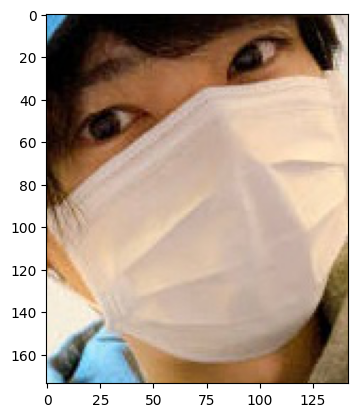

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_124.jpg')
imgplot = plt.imshow(img)
plt.show()

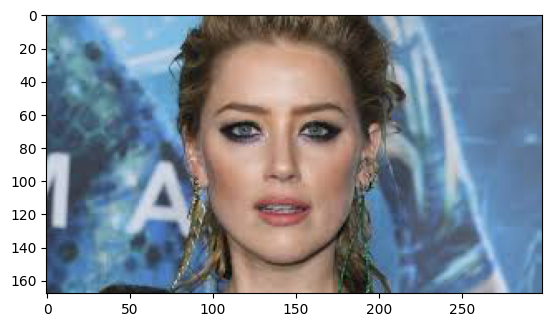

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2927.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing
1. Resize the images
2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [ 30,  30,  32],
        [ 31,  31,  33],
        [ 31,  31,  33]],

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [ 30,  30,  32],
        [ 31,  31,  33],
        [ 31,  31,  33]],

       [[ 30,  30,  30],
        [ 30,  30,  30],
        [ 30,  30,  30],
        ...,
        [ 30,  30,  32],
        [ 31,  31,  33],
        [ 31,  31,  33]],

       ...,

       [[240, 239, 245],
        [240, 239, 245],
        [239, 238, 244],
        ...,
        [240, 240, 242],
        [240, 240, 242],
        [240, 240, 242]],

       [[240, 239, 245],
        [240, 239, 245],
        [239, 238, 244],
        ...,
        [240, 240, 242],
        [240, 240, 242],
        [238, 238, 240]],

       [[240, 240, 246],
        [239, 239, 244],
        [238, 238, 243],
        ...,
        [239, 239, 241],
        [239, 239, 241],
        [238, 238, 240]]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 72,  48,  32],
        [ 96,  72,  59],
        [ 86,  62,  52],
        ...,
        [ 60,  40,  41],
        [ 48,  28,  29],
        [ 47,  29,  29]],

       [[ 92,  69,  54],
        [ 92,  69,  55],
        [ 83,  60,  49],
        ...,
        [ 73,  51,  53],
        [ 58,  38,  39],
        [ 46,  26,  27]],

       [[104,  82,  68],
        [ 75,  54,  41],
        [ 87,  66,  55],
        ...,
        [ 73,  48,  51],
        [ 68,  44,  47],
        [ 54,  34,  35]],

       ...,

       [[224, 229, 242],
        [227, 231, 244],
        [226, 230, 243],
        ...,
        [ 52,  52,  67],
        [ 50,  50,  64],
        [ 50,  48,  62]],

       [[232, 234, 246],
        [232, 232, 245],
        [230, 230, 243],
        ...,
        [ 94,  96, 123],
        [ 85,  86, 113],
        [ 74,  76, 100]],

       [[238, 237, 252],
        [237, 235, 250],
        [235, 232, 247],
        ...,
        [152, 156, 187],
        [148, 150, 180],
        [137, 143, 169]]

In [ ]:
X_train_scaled[0]

array([[[0.28235294, 0.18823529, 0.1254902 ],
        [0.37647059, 0.28235294, 0.23137255],
        [0.3372549 , 0.24313725, 0.20392157],
        ...,
        [0.23529412, 0.15686275, 0.16078431],
        [0.18823529, 0.10980392, 0.11372549],
        [0.18431373, 0.11372549, 0.11372549]],

       [[0.36078431, 0.27058824, 0.21176471],
        [0.36078431, 0.27058824, 0.21568627],
        [0.3254902 , 0.23529412, 0.19215686],
        ...,
        [0.28627451, 0.2       , 0.20784314],
        [0.22745098, 0.14901961, 0.15294118],
        [0.18039216, 0.10196078, 0.10588235]],

       [[0.40784314, 0.32156863, 0.26666667],
        [0.29411765, 0.21176471, 0.16078431],
        [0.34117647, 0.25882353, 0.21568627],
        ...,
        [0.28627451, 0.18823529, 0.2       ],
        [0.26666667, 0.17254902, 0.18431373],
        [0.21176471, 0.13333333, 0.1372549 ]],

       ...,

       [[0.87843137, 0.89803922, 0.94901961],
        [0.89019608, 0.90588235, 0.95686275],
        [0.88627451, 0

Bulding a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 159s 927ms/step - loss: 0.4279 - acc: 0.8218 - val_loss: 0.3987 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 148s 873ms/step - loss: 0.2866 - acc: 0.8843 - val_loss: 0.2250 - val_acc: 0.9058
Epoch 3/5
170/170 [==============================] - 146s 861ms/step - loss: 0.2375 - acc: 0.9029 - val_loss: 0.2007 - val_acc: 0.9273
Epoch 4/5
170/170 [==============================] - 145s 854ms/step - loss: 0.1771 - acc: 0.9307 - val_loss: 0.1538 - val_acc: 0.9471
Epoch 5/5
170/170 [==============================] - 146s 862ms/step - loss: 0.1675 - acc: 0.9332 - val_loss: 0.3071 - val_acc: 0.8942


Evaluating the model

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 11s 224ms/step - loss: 0.3255 - acc: 0.8908
Test Accuracy = 0.8908007740974426


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


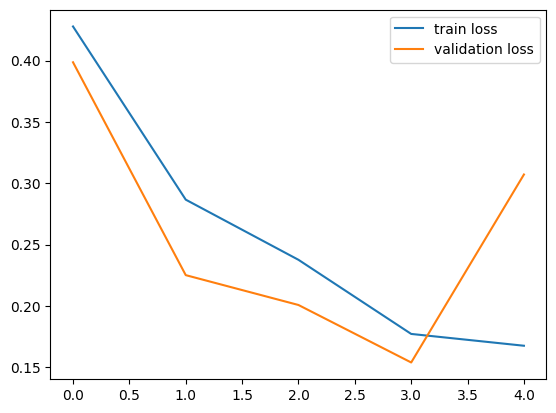

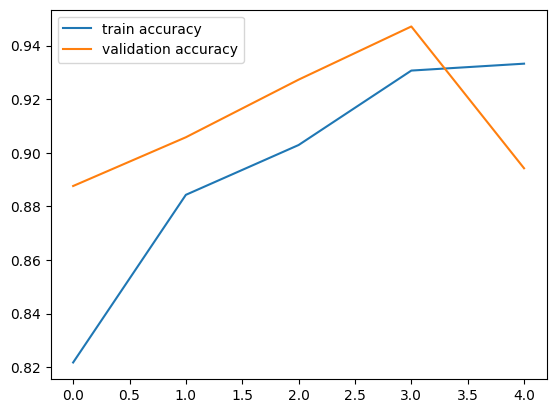

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/testn.png


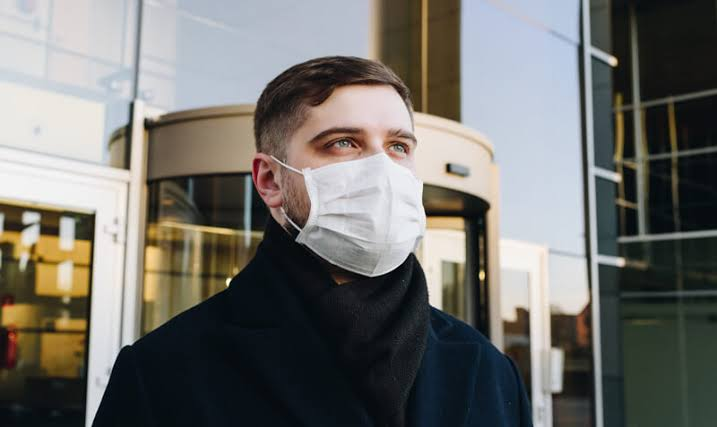

1/1 [==============================] - 0s 46ms/step
[[0.38295949 0.5167058 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/testy.png


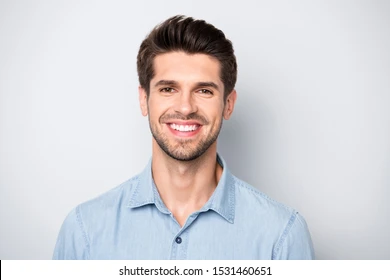

1/1 [==============================] - 0s 40ms/step
[[0.58227557 0.40040764]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')
